In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

In [3]:
y[:5]

array([[ 3.3818047 ],
       [-0.54884859],
       [ 3.41619716],
       [ 9.53881287],
       [ 5.92145408]])

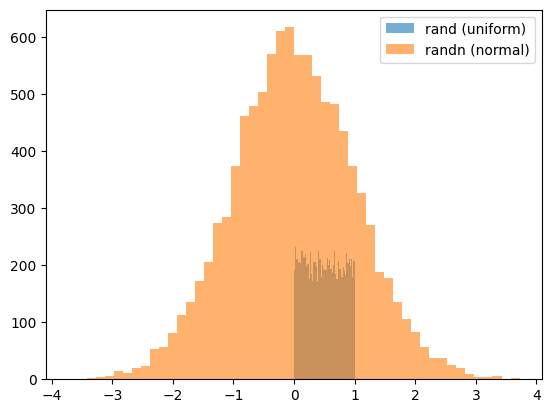

In [4]:
import matplotlib.pyplot as plt

plt.hist(np.random.rand(10000), bins=50, alpha=0.6, label='rand (uniform)')
plt.hist(np.random.randn(10000), bins=50, alpha=0.6, label='randn (normal)')
plt.legend()
plt.show()


Text(0, 0.5, 'Y data')

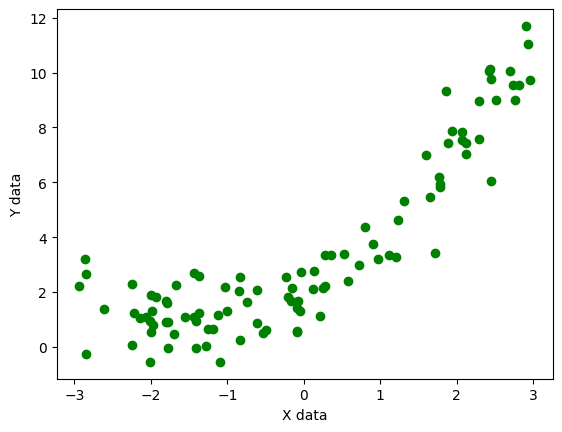

In [5]:
plt.scatter(X, y, color='green')
plt.xlabel('X data')
plt.ylabel('Y data')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = slr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.7183644967040874

Text(0, 0.5, 'y data')

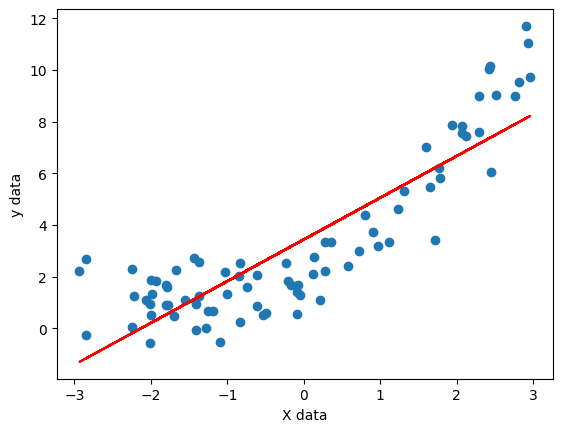

In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_train, slr.predict(X_train), color='r')
plt.xlabel('X data')
plt.ylabel('y data')

Lets apply polynomial transformations

In [11]:
X_train[0]

array([1.30586548])

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
X_train_poly[0]

array([1.        , 1.30586548, 1.70528466])

In [14]:
# Again calculating R2Score for the transformed data

slr = LinearRegression()
slr.fit(X_train_poly, y_train)
y_pred = slr.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.9239934033357923

In [15]:
slr.coef_

array([[0.        , 1.46336334, 0.49913402]])

In [16]:
slr.intercept_

array([2.01492899])

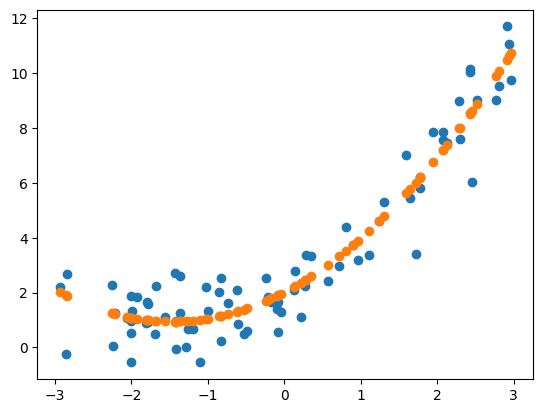

In [17]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, slr.predict(X_train_poly))

In [18]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [19]:
X_train_poly[0]

array([1.        , 1.30586548, 1.70528466, 2.22687237])

In [20]:
# Again calculating R2Score for the transformed data

slr = LinearRegression()
slr.fit(X_train_poly, y_train)
y_pred = slr.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.9199122057465554

In [21]:
slr.coef_ ,slr.intercept_

(array([[0.        , 1.3615744 , 0.4954832 , 0.01997395]]), array([2.0042715]))

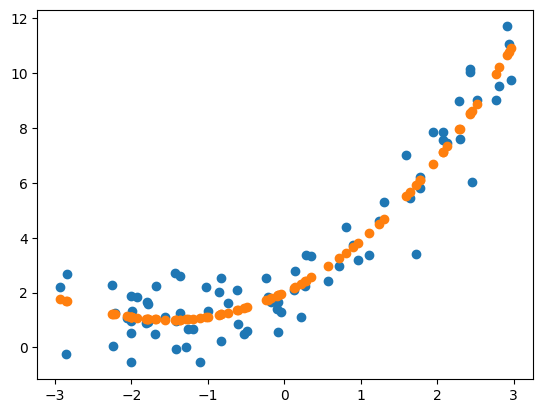

In [22]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, slr.predict(X_train_poly))

Prediction for New Data

In [23]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

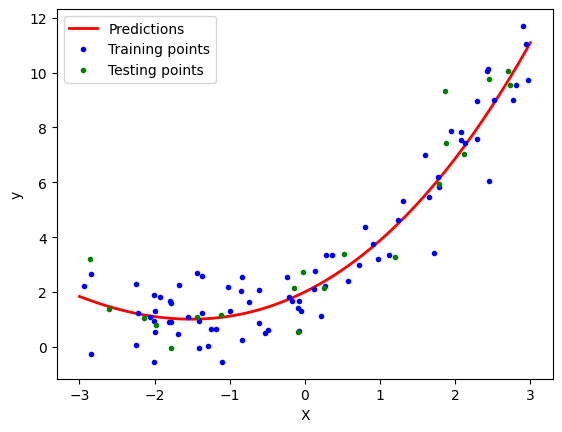

In [24]:
y_new = slr.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g.', label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    # plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label="Degree " + str(degree), linewidth=3)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")


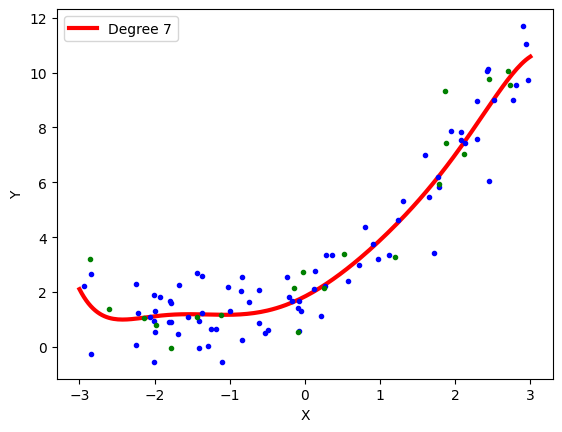

In [28]:
poly_regression(7)